In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# loading dataset

In [4]:
tit_dataset=pd.read_excel('titanic.xls')

In [5]:
len(tit_dataset)

1309

In [6]:
tit_dataset.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [7]:
tit_dataset['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [8]:
tit_dataset.index

RangeIndex(start=0, stop=1309, step=1)

# Analysis Data

<AxesSubplot: xlabel='survived', ylabel='count'>

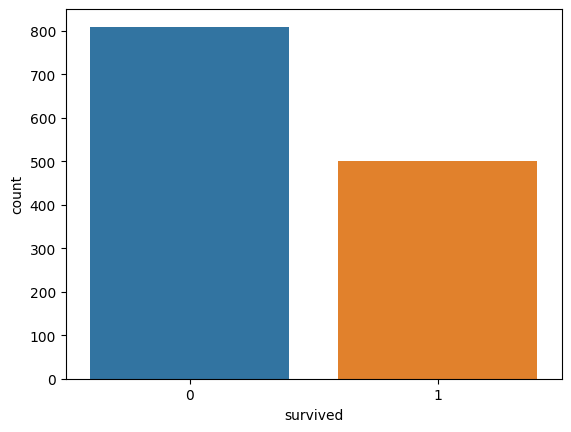

In [9]:
sns.countplot(x='survived',data=tit_dataset)

<AxesSubplot: xlabel='survived', ylabel='count'>

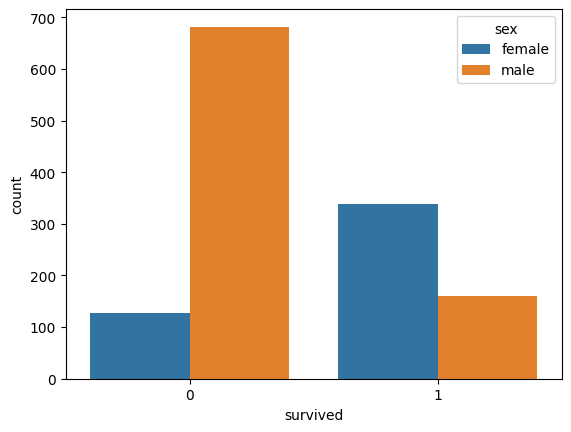

In [10]:
sns.countplot(x='survived',data=tit_dataset,hue='sex')

In [11]:
 tit_dataset.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot: >

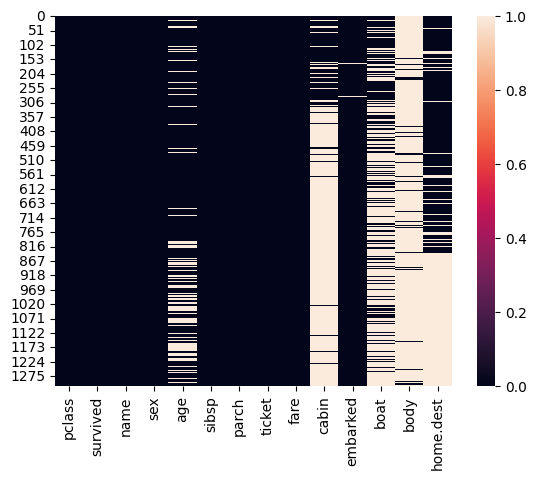

In [12]:
sns.heatmap(tit_dataset.isna())

In [13]:
(tit_dataset['age'].isna().sum()/len(tit_dataset['age']))*100

20.091673032849503

In [14]:
(tit_dataset['cabin'].isna().sum()/len(tit_dataset['cabin']))*100

77.46371275783041

In [15]:
(tit_dataset['boat'].isna().sum()/len(tit_dataset['boat']))*100

62.87242169595111

In [16]:
(tit_dataset['body'].isna().sum()/len(tit_dataset['body']))*100

90.75630252100841

In [17]:
(tit_dataset['home.dest'].isna().sum()/len(tit_dataset['home.dest']))*100

43.086325439266616

# Data Cleaning
Filling missing data, and dropped the column with null value more than half.

In [18]:
tit_dataset['age'].fillna(tit_dataset['age'].mean(),inplace=True)

In [19]:
tit_dataset['fare'].fillna(tit_dataset['fare'].mean(),inplace=True)

In [20]:
tit_dataset['age'].isna().sum()

0

In [21]:
tit_dataset.drop('cabin',axis=1,inplace=True)

In [22]:
tit_dataset.drop('body',axis=1,inplace=True)

In [23]:
tit_dataset.drop('boat',axis=1,inplace=True)

In [24]:
tit_dataset['home.dest'].fillna(0,inplace=True)

<AxesSubplot: >

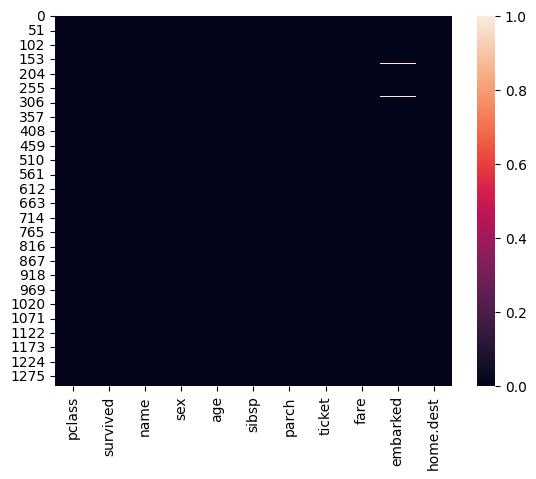

In [25]:
sns.heatmap(tit_dataset.isna())

In [26]:
tit_dataset.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare embarked  \
0  29.0000      0      0   24160  211.3375        S   
1   0.9167      1      2  113781  151.5500        S   
2   2.0000      1      2  113781  151.5500        S   
3  30.0000      1      2  113781  151.5500        S   
4  25.0000      1      2  113781  151.5500        S   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

# preprocessing data

In [27]:
tit_dataset.drop(['name','home.dest','ticket'],axis=1,inplace=True)

In [28]:
tit_dataset.drop(['embarked'],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
tit_dataset['sex']=en1.fit_transform(tit_dataset['sex'])

In [30]:
tit_dataset.head()

pclass  survived  sex      age  sibsp  parch      fare
0       1         1    0  29.0000      0      0  211.3375
1       1         1    1   0.9167      1      2  151.5500
2       1         0    0   2.0000      1      2  151.5500
3       1         0    1  30.0000      1      2  151.5500
4       1         0    0  25.0000      1      2  151.5500

<AxesSubplot: >

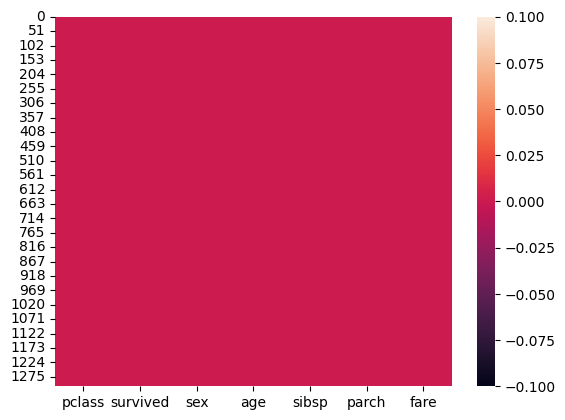

In [31]:
sns.heatmap(tit_dataset.isna())

In [32]:
x=tit_dataset[['pclass','sex','age','sibsp','parch','fare']]
y=tit_dataset['survived']

# Data Model

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
tit_dataset

pclass  survived  sex        age  sibsp  parch      fare
0          1         1    0  29.000000      0      0  211.3375
1          1         1    1   0.916700      1      2  151.5500
2          1         0    0   2.000000      1      2  151.5500
3          1         0    1  30.000000      1      2  151.5500
4          1         0    0  25.000000      1      2  151.5500
...      ...       ...  ...        ...    ...    ...       ...
1304       3         0    0  14.500000      1      0   14.4542
1305       3         0    0  29.881135      1      0   14.4542
1306       3         0    1  26.500000      0      0    7.2250
1307       3         0    1  27.000000      0      0    7.2250
1308       3         0    1  29.000000      0      0    7.8750

[1309 rows x 7 columns]

# here it was error and I searched about NaN value

In [57]:
np.isnan(tit_dataset.any())

pclass      False
survived    False
sex         False
age         False
sibsp       False
parch       False
fare        False
dtype: bool

In [58]:
tit_dataset.dtypes

pclass        int64
survived      int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [59]:
np.isfinite(tit_dataset.all())

pclass      True
survived    True
sex         True
age         True
sibsp       True
parch       True
fare        True
dtype: bool

In [60]:
np.any(np.isnan(tit_dataset))

True

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [66]:
X_train.isna().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      1
dtype: int64

# Predict

In [40]:
pred=lr.predict(X_test)

<AxesSubplot: >

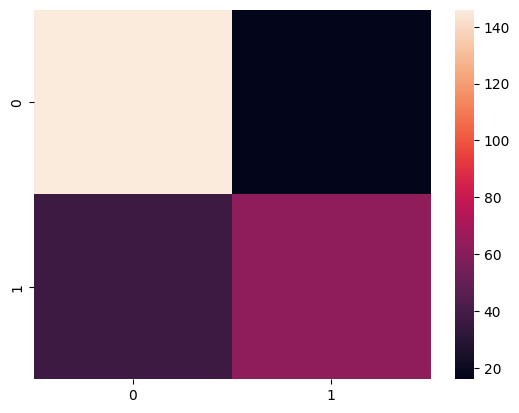

In [44]:
from sklearn.metrics import confusion_matrix
r=confusion_matrix(y_test,pred)
sns.heatmap(r)

# precision is the ratio of correctly predict
accuracy can increased by decrease the number of column that already dropped

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       162
           1       0.80      0.63      0.70       100

    accuracy                           0.80       262
   macro avg       0.80      0.77      0.78       262
weighted avg       0.80      0.80      0.79       262

